## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 13
---------------------------------------

GOALS:

1. Explore and respond to ideas around data ethics
2. Recreate other peoples work to more honestly reflect data.

----------------------------------------------------------

This homework has **4 questions** and **1 exercise**

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>

## Day 13 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day13 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day13-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Science Ethics

## Misrepresentation

Misrepresentation can happen intentionally or unintentionally. It can arise because of lack of knowledge of competence in data science. It is important to be aware of misrepresentation and be able to spot it a mile away in your work and in other peoples work!

What is wrong with this picture? How would you correct it?


![Confirmed Covid Cases](images/ga-dph-declining-bars.jpg)

- Overall this looks like the heights of bars are going down.
- Dates are on the x-axis.
- Are covid cases going down over time?

**Q1** Write in your own words what you see that is wrong with this graph. What is the story it is telling vs the real story in the data?


**Q2** Is it okay to misrepresent your data if you are getting people to "do the right thing"? For example, more exercise is good for you, right? Was it so bad to misrepresent the results of the cancer and exercise studies?

q1)  the x-axis dates are out of order, making it hard to track COVID-19 case trends over time. While it highlights the most impacted counties, the disorganized dates obscure any clear pattern, preventing an accurate understanding of case progression across counties.

q2)Misrepresenting data, even for a good cause, is risky. It can damage trust in science if people find out the truth. For the cancer and exercise studies, honest data helps people make real, informed choices. Good intentions don’t justify misleading information.


## Data Privacy

The question of data privacy is complicated and rests on the idea of what amount of expected privacy are we entitled to when we put our data online.

## Data Privacy -  Case study: 

**Q3** When analyzing data that is publicly shared, how can you make sure that you are not violating a persons reasonable expectation of privacy? What do you think the rules should be here? How would you want your data treated?

**Q4** Does the answer to the question "Should I scrape this data" vary based on what the data is about? Give two examples where the answer might be different.

q3)To protect privacy in public data, anonymize information, only use what's necessary, and respect the context of data sharing. Rules should enforce anonymization, purpose limits, and transparency. I’d want my data to be handled carefully, anonymized, and only used as I consented.

q4)Yes, the decision to scrape data depends on its type. Scraping public product prices is usually acceptable, but scraping personal details from social media raises privacy concerns, as users may not expect bulk collection. Different data types require different ethical considerations.

## Exercise 1

Consider the following visualization that was shared on Twitter:

[Visualization on Twitter](https://twitter.com/JonBoeckenstedt/status/1291602888376999936)

You are going to construct the data by reading (approximate is okay) the numbers from the picture.

1. What is most misleading about this graph - essay answer

2.  Create a data frame that can be used to re-construct this visualization. You may need to guess some of the numbers, that's ok. You should first think about how many rows and columns you'll need and what you want to call your variables.


Here is some code to get you started:

In [9]:
date = []
count_mask = []
count_nomask = []

DF = pd.DataFrame()
DF['date']=date
DF['count_mask']=count_mask
DF['count_nomask']=count_nomask
DF

,date,count_mask,count_nomask


3. Make a visualization of this data that is more accurate. Your visualization should more honestly tell the story.

               fig = pd.line(DF,x= ,y= )

   
5. What message is more clear in your visualization, compared to the one posted on twitter?
6. What, if any, useful information do these data and your visualization tell us about mask wearing and COVID? It’ll be difficult to set aside what you already know about mask wearing, but you should try to focus only on what this visualization tells. Feel free to also comment on whether that lines up with what you know about mask wearing.
7. Could there be confounding data? What can you actually say about the data as given?

In [ ]:
1.  it uses separate y-axes for "Mask" and "No Mask" counties, exaggerating the perceived difference between the two groups. This can give the impression of a large gap in COVID-19 case rates that may not exist when plotted on the same scale.


In [15]:
#2
date = [
    '2020-07-03', '2020-07-06', '2020-07-09', '2020-07-12', '2020-07-15', 
    '2020-07-18', '2020-07-21', '2020-07-24', '2020-07-27', '2020-07-30', 
    '2020-08-02', '2020-08-03'
]
count_mask = [25, 21, 20, 19, 20, 19, 17, 16, 15, 14, 14, 14]
count_nomask = [21, 20, 21, 20, 19, 19, 18, 17, 16, 15, 15, 15]

DF = pd.DataFrame()
DF['date'] = date
DF['count_mask'] = count_mask
DF['count_nomask'] = count_nomask

DF


,date,count_mask,count_nomask
0,2020-07-03,25,21
1,2020-07-06,21,20
2,2020-07-09,20,21
3,2020-07-12,19,20
4,2020-07-15,20,19
5,2020-07-18,19,19
6,2020-07-21,17,18
7,2020-07-24,16,17
8,2020-07-27,15,16
9,2020-07-30,14,15


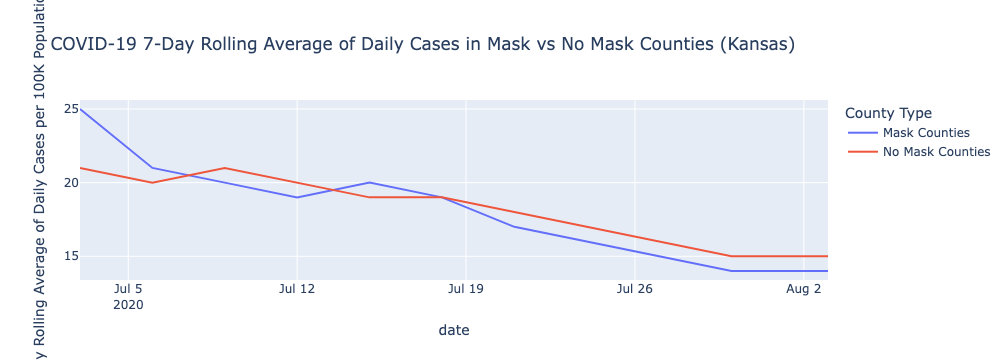

In [19]:
#3
DF['date'] = pd.to_datetime(DF['date'])

fig = px.line(DF, x='date', y=['count_mask', 'count_nomask'], 
              labels={'value': '7-Day Rolling Average of Daily Cases per 100K Population', 'variable': 'County Type'},
              title="COVID-19 7-Day Rolling Average of Daily Cases in Mask vs No Mask Counties (Kansas)")

fig.for_each_trace(lambda t: t.update(name={'count_mask': 'Mask Counties', 'count_nomask': 'No Mask Counties'}[t.name]))

fig.show()


In [23]:
#4. The new chart shows a modest difference between mask and no-mask counties, without exaggerating the effect. This provides a more honest view of the data.
#5.The data suggests mask mandates may slightly reduce COVID-19 cases, but the effect is modest and not conclusive.
#6.Other factors like population density or local policies could affect case rates. This data only shows a correlation, not causation.